# Observational Data Analysis with NumPy Arrays

This notebook demonstrates how to analyze observational data using NumPy arrays. We'll work with different types of personal data collection scenarios and show how to effectively use arrays for data storage and analysis.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt

## Define the Observational Data

For this analysis, we'll work with three types of observational data:

1. **Mood scores** (1-10 scale) - collected hourly during waking hours (7 AM to 11 PM)
2. **Sleep hours** - daily sleep duration over a week
3. **Water intake** - glasses of water consumed each hour during waking hours

### Data Structure:
- **1D arrays**: Sleep hours (one value per day)
- **2D arrays**: Mood and water intake (hours × days matrix)

## Store Data in Arrays

Let's create NumPy arrays to store our observational data. We'll simulate a week's worth of data collection.

In [2]:
# Define time parameters
waking_hours = 16  # 7 AM to 11 PM
days = 7

# 1D Array: Daily sleep hours for a week
sleep_hours = np.array([7.5, 6.8, 8.2, 7.1, 6.5, 8.9, 9.2])
print("Sleep hours (1D array):")
print(f"Shape: {sleep_hours.shape}")
print(f"Data: {sleep_hours}")
print()

# 2D Array: Mood scores (hours × days)
# Rows represent hours (7 AM to 11 PM), columns represent days
np.random.seed(42)  # For reproducible results
mood_data = np.random.randint(4, 9, size=(waking_hours, days)) + np.random.normal(0, 0.5, size=(waking_hours, days))
mood_data = np.clip(mood_data, 1, 10)  # Ensure values stay within 1-10 range

print("Mood scores (2D array):")
print(f"Shape: {mood_data.shape} (hours × days)")
print("Sample data (first 5 hours, all days):")
print(mood_data[:5, :])
print()

# 2D Array: Water intake (glasses per hour)
water_intake = np.random.poisson(0.3, size=(waking_hours, days))  # Poisson distribution for count data
water_intake = np.clip(water_intake, 0, 3)  # Cap at 3 glasses per hour

print("Water intake (2D array):")
print(f"Shape: {water_intake.shape} (hours × days)")
print("Sample data (first 5 hours, all days):")
print(water_intake[:5, :])

Sleep hours (1D array):
Shape: (7,)
Data: [7.5 6.8 8.2 7.1 6.5 8.9 9.2]

Mood scores (2D array):
Shape: (16, 7) (hours × days)
Sample data (first 5 hours, all days):
[[7.18081801 7.67744012 6.1806978  8.76901828 7.98208698 5.78232183
  4.69012745]
 [6.41095125 6.04352353 7.85049632 7.04588039 5.00621554 7.89016406
  5.17855629]
 [7.73894702 4.74086489 6.5957532  7.74912148 4.45770106 7.16437555
  4.7351199 ]
 [8.25663372 7.04853877 4.4843225  3.64897345 5.83616893 5.80394592
  4.26824253]
 [7.14806014 7.13052764 6.00255673 6.88270643 6.29231463 3.78967734
  5.82864274]]

Water intake (2D array):
Shape: (16, 7) (hours × days)
Sample data (first 5 hours, all days):
[[0 0 0 0 0 0 3]
 [0 1 3 0 1 0 0]
 [1 0 0 0 1 0 1]
 [0 0 0 0 1 2 0]
 [1 0 1 0 0 0 0]]


## Analyze Data Using Indexing and Slicing

Now let's use NumPy's powerful indexing and slicing capabilities to extract specific portions of our data for analysis.

In [3]:
# Define hour ranges for analysis
morning_hours = slice(0, 4)    # 7 AM - 11 AM
afternoon_hours = slice(4, 9)  # 11 AM - 4 PM
evening_hours = slice(9, 16)   # 4 PM - 11 PM

# Weekdays vs Weekend analysis
weekdays = slice(0, 5)  # Monday to Friday
weekend = slice(5, 7)   # Saturday and Sunday

print("=== INDEXING AND SLICING EXAMPLES ===")
print()

# Extract specific day's data
print("Day 1 (Monday) mood scores throughout the day:")
monday_mood = mood_data[:, 0]
print(f"Shape: {monday_mood.shape}")
print(f"Data: {monday_mood}")
print()

# Extract specific time period across all days
print("Morning mood scores (7-11 AM) for all days:")
morning_moods = mood_data[morning_hours, :]
print(f"Shape: {morning_moods.shape}")
print(morning_moods)
print()

# Extract weekend sleep data
print("Weekend sleep hours:")
weekend_sleep = sleep_hours[weekend]
print(f"Weekend sleep: {weekend_sleep}")
print()

# Extract specific cells using fancy indexing
print("Mood at specific times and days:")
specific_times = [0, 5, 10, 15]  # 7 AM, 12 PM, 5 PM, 10 PM
specific_days = [0, 3, 6]        # Monday, Thursday, Sunday
specific_moods = mood_data[np.ix_(specific_times, specific_days)]
print(f"Shape: {specific_moods.shape}")
print("Times: 7 AM, 12 PM, 5 PM, 10 PM")
print("Days: Monday, Thursday, Sunday")
print(specific_moods)

=== INDEXING AND SLICING EXAMPLES ===

Day 1 (Monday) mood scores throughout the day:
Shape: (16,)
Data: [7.18081801 6.41095125 7.73894702 8.25663372 7.14806014 7.59886137
 6.04061439 6.41566098 7.29342855 5.03428149 4.40675861 7.39091144
 3.65998764 4.3282768  5.41103008 8.17057599]

Morning mood scores (7-11 AM) for all days:
Shape: (4, 7)
[[7.18081801 7.67744012 6.1806978  8.76901828 7.98208698 5.78232183
  4.69012745]
 [6.41095125 6.04352353 7.85049632 7.04588039 5.00621554 7.89016406
  5.17855629]
 [7.73894702 4.74086489 6.5957532  7.74912148 4.45770106 7.16437555
  4.7351199 ]
 [8.25663372 7.04853877 4.4843225  3.64897345 5.83616893 5.80394592
  4.26824253]]

Weekend sleep hours:
Weekend sleep: [8.9 9.2]

Mood at specific times and days:
Shape: (4, 3)
Times: 7 AM, 12 PM, 5 PM, 10 PM
Days: Monday, Thursday, Sunday
[[7.18081801 8.76901828 4.69012745]
 [7.59886137 4.94309295 3.96277704]
 [4.40675861 5.65357138 4.1299414 ]
 [8.17057599 6.00650095 7.36008458]]


## Calculate Average and Differences

Let's compute meaningful statistics from our observational data, including averages during different time periods and changes over time.

In [4]:
print("=== STATISTICAL ANALYSIS ===")
print()

# Calculate average values during waking hours
print("1. AVERAGE CALCULATIONS:")
print("-" * 25)

# Daily averages
daily_avg_mood = np.mean(mood_data, axis=0)  # Average across hours (axis=0)
daily_avg_water = np.mean(water_intake, axis=0)

print("Daily average mood scores:")
for i, avg in enumerate(daily_avg_mood):
    day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    print(f"  {day_names[i]}: {avg:.2f}")
print()

# Time-of-day averages
hourly_avg_mood = np.mean(mood_data, axis=1)  # Average across days (axis=1)
hourly_avg_water = np.mean(water_intake, axis=1)

print("Average mood by time of day (across all days):")
print(f"  Morning (7-11 AM): {np.mean(hourly_avg_mood[morning_hours]):.2f}")
print(f"  Afternoon (11 AM-4 PM): {np.mean(hourly_avg_mood[afternoon_hours]):.2f}")
print(f"  Evening (4-11 PM): {np.mean(hourly_avg_mood[evening_hours]):.2f}")
print()

# Overall averages
print("Overall averages:")
print(f"  Sleep: {np.mean(sleep_hours):.2f} hours")
print(f"  Mood: {np.mean(mood_data):.2f}")
print(f"  Water intake: {np.mean(water_intake):.2f} glasses/hour")
print()

print("2. DIFFERENCE CALCULATIONS:")
print("-" * 26)

# Calculate differences between beginning and end of duration
print("Daily mood changes (last hour - first hour):")
daily_mood_change = mood_data[-1, :] - mood_data[0, :]  # Last hour minus first hour
for i, change in enumerate(daily_mood_change):
    day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    print(f"  {day_names[i]}: {change:+.2f}")
print()

# Weekly trends
print("Weekly trends:")
sleep_change = sleep_hours[-1] - sleep_hours[0]  # Sunday minus Monday
weekly_mood_trend = np.mean(mood_data[:, -1]) - np.mean(mood_data[:, 0])  # Sunday avg minus Monday avg

print(f"  Sleep change (Sun vs Mon): {sleep_change:+.2f} hours")
print(f"  Mood change (Sun vs Mon): {weekly_mood_trend:+.2f}")
print()

# Calculate standard deviations for variability analysis
print("3. VARIABILITY ANALYSIS:")
print("-" * 22)
print(f"Sleep variability (std): {np.std(sleep_hours):.2f} hours")
print(f"Mood variability (std): {np.std(mood_data):.2f}")
print(f"Water intake variability (std): {np.std(water_intake):.2f}")

=== STATISTICAL ANALYSIS ===

1. AVERAGE CALCULATIONS:
-------------------------
Daily average mood scores:
  Mon: 6.41
  Tue: 6.01
  Wed: 6.55
  Thu: 5.79
  Fri: 6.01
  Sat: 6.39
  Sun: 5.33

Average mood by time of day (across all days):
  Morning (7-11 AM): 6.29
  Afternoon (11 AM-4 PM): 6.15
  Evening (4-11 PM): 5.88

Overall averages:
  Sleep: 7.74 hours
  Mood: 6.07
  Water intake: 0.27 glasses/hour

2. DIFFERENCE CALCULATIONS:
--------------------------
Daily mood changes (last hour - first hour):
  Mon: +0.99
  Tue: -1.54
  Wed: +1.23
  Thu: -2.76
  Fri: -1.26
  Sat: -1.91
  Sun: +2.67

Weekly trends:
  Sleep change (Sun vs Mon): +1.70 hours
  Mood change (Sun vs Mon): -1.08

3. VARIABILITY ANALYSIS:
----------------------
Sleep variability (std): 0.97 hours
Mood variability (std): 1.40
Water intake variability (std): 0.60


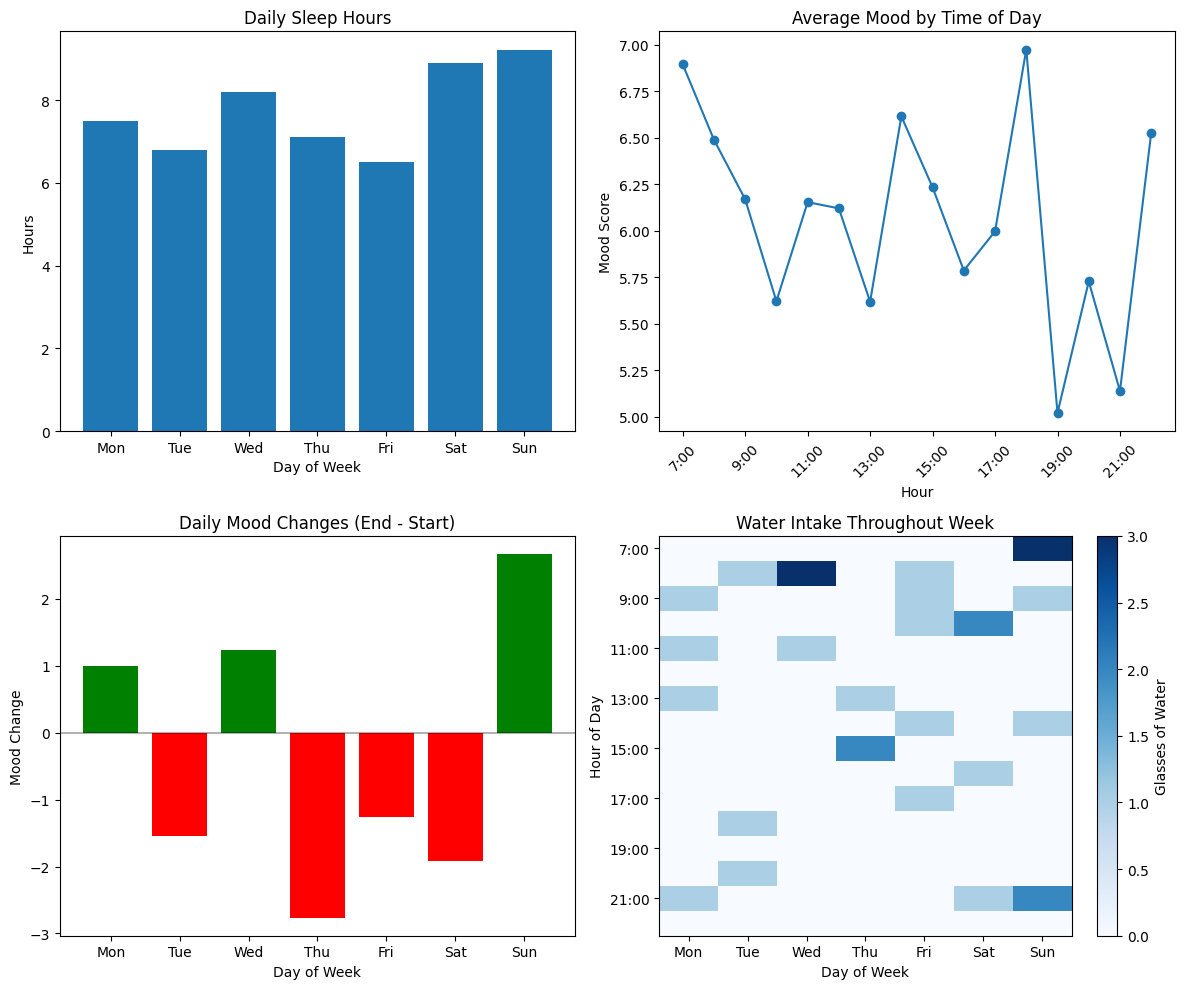

In [5]:
# Visualize the data for better understanding
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot 1: Daily sleep hours
axes[0, 0].bar(range(7), sleep_hours)
axes[0, 0].set_title('Daily Sleep Hours')
axes[0, 0].set_xlabel('Day of Week')
axes[0, 0].set_ylabel('Hours')
axes[0, 0].set_xticks(range(7))
axes[0, 0].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

# Plot 2: Average mood by time of day
hours_labels = [f"{7+i}:00" for i in range(waking_hours)]
axes[0, 1].plot(hourly_avg_mood, marker='o')
axes[0, 1].set_title('Average Mood by Time of Day')
axes[0, 1].set_xlabel('Hour')
axes[0, 1].set_ylabel('Mood Score')
axes[0, 1].set_xticks(range(0, waking_hours, 2))
axes[0, 1].set_xticklabels([hours_labels[i] for i in range(0, waking_hours, 2)], rotation=45)

# Plot 3: Daily mood changes
axes[1, 0].bar(range(7), daily_mood_change, color=['red' if x < 0 else 'green' for x in daily_mood_change])
axes[1, 0].set_title('Daily Mood Changes (End - Start)')
axes[1, 0].set_xlabel('Day of Week')
axes[1, 0].set_ylabel('Mood Change')
axes[1, 0].set_xticks(range(7))
axes[1, 0].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
axes[1, 0].axhline(y=0, color='black', linestyle='-', alpha=0.3)

# Plot 4: Water intake heatmap
im = axes[1, 1].imshow(water_intake, cmap='Blues', aspect='auto')
axes[1, 1].set_title('Water Intake Throughout Week')
axes[1, 1].set_xlabel('Day of Week')
axes[1, 1].set_ylabel('Hour of Day')
axes[1, 1].set_xticks(range(7))
axes[1, 1].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
axes[1, 1].set_yticks(range(0, waking_hours, 2))
axes[1, 1].set_yticklabels([f"{7+i}:00" for i in range(0, waking_hours, 2)])
plt.colorbar(im, ax=axes[1, 1], label='Glasses of Water')

plt.tight_layout()
plt.show()

## Summary

This notebook demonstrated how to:

1. **Structure observational data** using appropriate NumPy array dimensions (1D for simple time series, 2D for multi-dimensional tracking)

2. **Store and organize data** efficiently in arrays for easy manipulation and analysis

3. **Use indexing and slicing** to extract meaningful subsets of data:
   - Specific time periods (morning, afternoon, evening)
   - Specific days (weekdays vs weekends)
   - Individual data points using fancy indexing

4. **Calculate meaningful statistics**:
   - Averages across different dimensions (daily, hourly)
   - Changes over time (daily mood swings, weekly trends)
   - Variability measures (standard deviation)

### Key NumPy Concepts Used:
- **Array creation**: `np.array()`, `np.random` functions
- **Indexing**: Basic indexing, slicing with `slice()`, fancy indexing with `np.ix_()`
- **Statistical functions**: `np.mean()`, `np.std()`, aggregation along specific axes
- **Array operations**: Element-wise operations, broadcasting

This approach can be easily adapted for other types of observational data such as exercise tracking, eating habits, productivity metrics, or any other quantifiable personal data collection scenarios.

## Real-World Data Collection Examples

Here are some practical examples of observable activities you can track in your daily life. Each example shows whether to use 1D or 2D arrays and why.

In [6]:
# Example 1: Coffee consumption tracking (2D array)
# Track cups of coffee per hour for a week
print("=== COFFEE CONSUMPTION EXAMPLE ===")
print("🍵 Recording cups of coffee consumed each hour during waking hours")
print()

# Coffee data: hours (7 AM to 11 PM) × days
coffee_data = np.array([
    # Mon  Tue  Wed  Thu  Fri  Sat  Sun
    [1,   1,   1,   1,   1,   0,   0],  # 7 AM
    [0,   0,   1,   0,   0,   1,   1],  # 8 AM
    [1,   1,   0,   1,   1,   1,   0],  # 9 AM
    [0,   1,   1,   0,   0,   0,   1],  # 10 AM
    [0,   0,   0,   1,   0,   0,   0],  # 11 AM
    [1,   1,   1,   1,   0,   0,   1],  # 1 PM
    [0,   0,   0,   0,   1,   1,   0],  # 2 PM
])

print(f"Coffee data shape: {coffee_data.shape} (7 hours × 7 days)")
print("Why 2D? We're tracking both TIME and DAY dimensions")
print()

# Daily totals using slicing
daily_coffee = np.sum(coffee_data, axis=0)
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

print("Daily coffee consumption:")
for i, day in enumerate(days):
    print(f"  {day}: {daily_coffee[i]} cups")

# Average during the week
avg_daily = np.mean(daily_coffee)
print(f"\nAverage cups per day: {avg_daily:.2f}")

# Difference between beginning and end of week
week_change = daily_coffee[-1] - daily_coffee[0]
print(f"Change from Monday to Sunday: {week_change:+d} cups")

# Find peak coffee time
hourly_totals = np.sum(coffee_data, axis=1)
peak_hour = np.argmax(hourly_totals)
coffee_hours = ['7 AM', '8 AM', '9 AM', '10 AM', '11 AM', '1 PM', '2 PM']
print(f"Peak coffee time: {coffee_hours[peak_hour]}")

=== COFFEE CONSUMPTION EXAMPLE ===
🍵 Recording cups of coffee consumed each hour during waking hours

Coffee data shape: (7, 7) (7 hours × 7 days)
Why 2D? We're tracking both TIME and DAY dimensions

Daily coffee consumption:
  Mon: 3 cups
  Tue: 4 cups
  Wed: 4 cups
  Thu: 4 cups
  Fri: 3 cups
  Sat: 3 cups
  Sun: 3 cups

Average cups per day: 3.43
Change from Monday to Sunday: +0 cups
Peak coffee time: 7 AM


In [7]:
# Example 2: Phone pickups (1D array)
print("\n=== PHONE PICKUP EXAMPLE ===")
print("📱 Recording total phone pickups per day")
print()

# Phone pickup data: just daily totals
phone_pickups = np.array([47, 52, 38, 61, 45, 73, 69])

print(f"Phone data shape: {phone_pickups.shape}")
print("Why 1D? We're only tracking ONE value per day (total pickups)")
print()

print("Daily phone pickups:")
for i, day in enumerate(days):
    print(f"  {day}: {phone_pickups[i]} pickups")

# Weekday vs weekend analysis using slicing
weekdays = phone_pickups[0:5]  # Monday to Friday
weekend = phone_pickups[5:7]   # Saturday and Sunday

print(f"\nWeekday average: {np.mean(weekdays):.1f} pickups")
print(f"Weekend average: {np.mean(weekend):.1f} pickups")

# Weekly change
week_change = phone_pickups[-1] - phone_pickups[0]
print(f"Change from Monday to Sunday: {week_change:+d} pickups")

# Find extremes using indexing
max_day_idx = np.argmax(phone_pickups)
min_day_idx = np.argmin(phone_pickups)
print(f"Highest usage: {days[max_day_idx]} ({phone_pickups[max_day_idx]} pickups)")
print(f"Lowest usage: {days[min_day_idx]} ({phone_pickups[min_day_idx]} pickups)")


=== PHONE PICKUP EXAMPLE ===
📱 Recording total phone pickups per day

Phone data shape: (7,)
Why 1D? We're only tracking ONE value per day (total pickups)

Daily phone pickups:
  Mon: 47 pickups
  Tue: 52 pickups
  Wed: 38 pickups
  Thu: 61 pickups
  Fri: 45 pickups
  Sat: 73 pickups
  Sun: 69 pickups

Weekday average: 48.6 pickups
Weekend average: 71.0 pickups
Change from Monday to Sunday: +22 pickups
Highest usage: Sat (73 pickups)
Lowest usage: Wed (38 pickups)


In [8]:
# Example 3: More tracking ideas and when to use 1D vs 2D
print("\n=== MORE TRACKING IDEAS ===")
print()

tracking_ideas = {
    '1D Arrays (one value per time period)': [
        '💤 Hours of sleep per night',
        '💧 Total glasses of water per day',
        '🥱 Number of yawns per day',
        '📚 Pages read per day',
        '🚶 Total steps per day',
        '💰 Money spent per day',
        '📧 Emails received per day'
    ],
    '2D Arrays (detailed time tracking)': [
        '🍵 Mood score every hour (hours × days)',
        '☕ Coffee/tea consumption per hour',
        '💧 Water intake per hour',
        '🎵 Songs listened to per hour',
        '👀 Social media checks per hour',
        '📱 Screen time per hour',
        '🚶 Steps taken per hour'
    ]
}

for array_type, ideas in tracking_ideas.items():
    print(f"{array_type}:")
    for idea in ideas:
        print(f"  {idea}")
    print()

print("DECISION GUIDE:")
print("- Use 1D if you want simple daily/weekly totals")
print("- Use 2D if you want to see patterns throughout the day")
print("- Use 2D if you want to analyze time-of-day effects")


=== MORE TRACKING IDEAS ===

1D Arrays (one value per time period):
  💤 Hours of sleep per night
  💧 Total glasses of water per day
  🥱 Number of yawns per day
  📚 Pages read per day
  🚶 Total steps per day
  💰 Money spent per day
  📧 Emails received per day

2D Arrays (detailed time tracking):
  🍵 Mood score every hour (hours × days)
  ☕ Coffee/tea consumption per hour
  💧 Water intake per hour
  🎵 Songs listened to per hour
  👀 Social media checks per hour
  📱 Screen time per hour
  🚶 Steps taken per hour

DECISION GUIDE:
- Use 1D if you want simple daily/weekly totals
- Use 2D if you want to see patterns throughout the day
- Use 2D if you want to analyze time-of-day effects


In [9]:
# Practical indexing and slicing techniques
print("=== INDEXING & SLICING TECHNIQUES ===")
print()

# Create sample 2D mood data for demonstration
np.random.seed(42)
sample_mood = np.random.randint(4, 9, size=(16, 7)) # 16 hours × 7 days

print("Common slicing patterns:")
print()

# 1. Extract specific days
monday_mood = sample_mood[:, 0]  # All hours on Monday
print(f"Monday mood (all hours): shape {monday_mood.shape}")

# 2. Extract time periods
morning_mood = sample_mood[0:4, :]  # First 4 hours, all days
print(f"Morning mood (all days): shape {morning_mood.shape}")

# 3. Extract weekdays vs weekends
weekday_mood = sample_mood[:, 0:5]  # All hours, Mon-Fri
weekend_mood = sample_mood[:, 5:7]  # All hours, Sat-Sun
print(f"Weekday mood: shape {weekday_mood.shape}")
print(f"Weekend mood: shape {weekend_mood.shape}")

# 4. Extract specific hours and days
lunch_mood = sample_mood[6, :]  # Hour 6 (1 PM), all days
print(f"Lunch time mood: shape {lunch_mood.shape}")

# 5. Advanced indexing
peak_hours = [0, 6, 12, 15]  # 7 AM, 1 PM, 7 PM, 10 PM
peak_days = [0, 2, 4, 6]     # Mon, Wed, Fri, Sun
peak_mood = sample_mood[np.ix_(peak_hours, peak_days)]
print(f"Peak times/days mood: shape {peak_mood.shape}")

print()
print("Analysis examples:")
print(f"  Average morning mood: {np.mean(morning_mood):.2f}")
print(f"  Weekday vs weekend difference: {np.mean(weekday_mood) - np.mean(weekend_mood):+.2f}")
print(f"  Monday to Sunday change: {np.mean(sample_mood[:, 6]) - np.mean(sample_mood[:, 0]):+.2f}")

=== INDEXING & SLICING TECHNIQUES ===

Common slicing patterns:

Monday mood (all hours): shape (16,)
Morning mood (all days): shape (4, 7)
Weekday mood: shape (16, 5)
Weekend mood: shape (16, 2)
Lunch time mood: shape (7,)
Peak times/days mood: shape (4, 4)

Analysis examples:
  Average morning mood: 6.32
  Weekday vs weekend difference: +0.19
  Monday to Sunday change: -0.81
